In [1]:
import sys
import numpy as np
import inspect
import math
import re

from matplotlib import pyplot as plt

# import
if('models' not in sys.path):
    sys.path.append('models')

from BOCS import BOCS
from Oracle import Oracle
from HorseshoeBayesReg import HorseshoeBayesReg
from utils import get_alpha, expand

In [2]:
%%time 

# Hyperparameters
n = 150
d = 18
k = 2
sigma_eps = 0.3

np.random.seed(490)

# Oracle
alpha  = get_alpha(d=d, k=k, p_zero=0.9)
f      = lambda x : sum([x_i*a_i for x_i, a_i in zip(x, alpha)])
o1     = Oracle(fun=f, x_dim=len(alpha), sigma=sigma_eps, max_eval=10**5) 

# Data
X      = np.random.binomial(n=1, p=0.5, size=n*d).reshape(n,-1)
y      = np.random.normal(expand(X, k) @ alpha, scale=sigma_eps)

# BOCS
b1 = BOCS(n_sim=100, oracle=o1, d=X.shape[1], k=2, afo='SDP', kind='min', alpha_GT=alpha, standardizeX=True)
b1.fit(X, y)
b1.run(N=20, refitFreq=1)

CPU times: user 15min 49s, sys: 28min 14s, total: 44min 3s
Wall time: 48.1 s


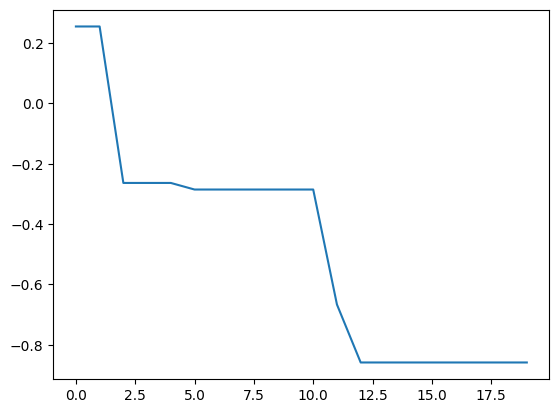

In [3]:
plt.plot(b1.get_result('f_opt'))

In [ ]:
b1.oracle.f_max, b1.oracle.f_min

In [ ]:
b1.f_opt